# Autonomous Live Looper (ALL)
The Autonomous Live Looper (ALL) is a co-creative sampler/looper based on a multi-agent logic algorithm and machine listening. The ALL is composed of several agents, each controlling a loop track, which can autonomously decide to sample and play back segments of a live vocal performance by listening to each other. The Autonomous Live Looper aims to expands the possibilities for indirect control, interaction, and co-creativity in live looping for improvising musicians.

This tutorial demonstrates the basic functions of the offline version of the ALL. We show the sound descriptors computed by the ALL and how they are compared.

## Loading the Offline ALL and the soundfile
We first initialize the offline all from a configuration file and a soundfile from a corpus.


Initializing Autonomous Looper offline
--------------------------------------------------

Configuration options:
{
    "tempo": 105,
    "beats_per_loop": 4,
    "rhythm_subdivision": 32,
    "looping-rules": [
        [
            {
                "rule-name": "Timbral similarity",
                "rule-type": "more",
                "rule-threshold": 0.001
            },
            {
                "rule-name": "Rhythmic similarity",
                "rule-type": "less",
                "rule-threshold": 0.8
            }
        ],
        [
            {
                "rule-name": "Timbral similarity",
                "rule-type": "more",
                "rule-threshold": 0.001
            },
            {
                "rule-name": "Rhythmic similarity",
                "rule-type": "less",
                "rule-threshold": 0.7
            }
        ],
        [
            {
                "rule-name": "Timbral similarity",
                "rule-type": "more",
         

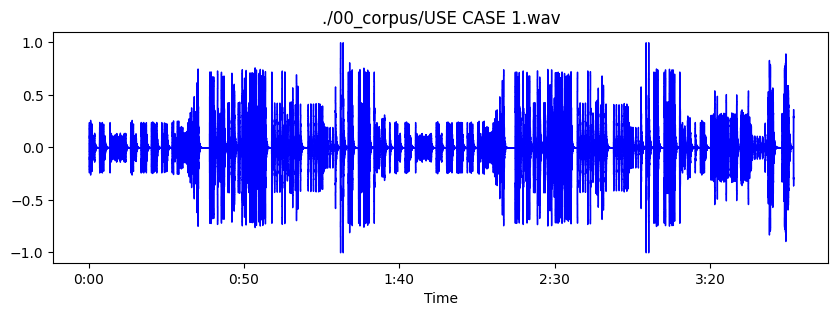

In [9]:
import matplotlib.pyplot as plt
from offlineALLclass import AutonomousLooperOffline

# DEFINE SCRIPT PARAMETERS
soundfile_filepath = './00_corpus/USE CASE 1.wav'
config_filepath = './config.json'
output_dir_path = "./01_output_offline"

looper = AutonomousLooperOffline(soundfile_filepath, 
                                 config_filepath=config_filepath, 
                                 plotFlag=True)

## Extracting features
We start by selecting a segment of the duration specified in the config file.

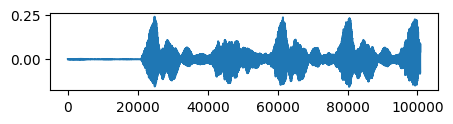

In [10]:
segment_num = 10
segment = looper.signal[looper.signal_subdivided_samples[segment_num]:looper.signal_subdivided_samples[segment_num+1]]
plt.figure(figsize=(5, 1))
plt.plot(segment)
plt.show()

### Binary rhythm
Rhythm is computed as a binary representation with a subdivision specified in the config file. 

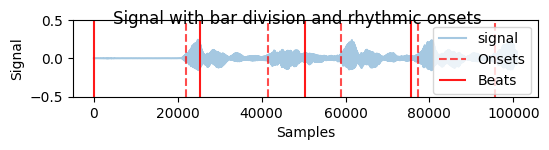

Binary rhythm:  [0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0]


In [12]:
rhythm_subdivisions=16
binary_rhythm, onsets, _, _ = looper.computeBinaryRhythm(segment, looper.sr, 
                                                         rhythm_subdivisions=rhythm_subdivisions,
                                                         plotflag=True)

### Chroma
The chroma descriptor computes the distribution of the spectrum in the 12 pitch classes of Western notation. We can compute a continuous or a discrete representation of chroma. 

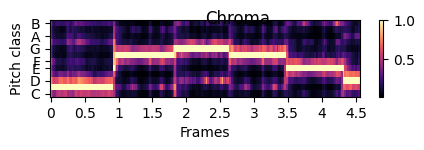

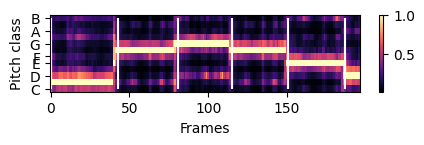

In [13]:
chroma = looper.computeChroma(segment, looper.sr, plotflag=True)
discrete_chroma = looper.computeDiscreteChroma(chroma, onsets, looper.sr, plotflag=True)

### Spectral bandwidth
We compute the spectral bandwidth of the segment as the variance of the mel-scaled spectrogram around its center of mass. This can give information, for example, about the register in which an instrument is playing.

/opt/anaconda3/envs/looper/lib/python3.13/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(
/Users/vincemad/Desktop/PhD/04_project/04_autonomous-live-looper/ALL-Autonomous-Live-Looper/offlineALLclass.py:609: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  img = librosa.display.specshow(CQT, y_axis='cqt_note', x_axis='time', ax=ax)


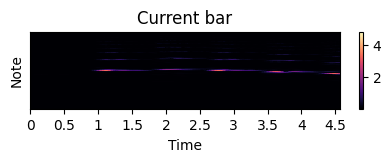

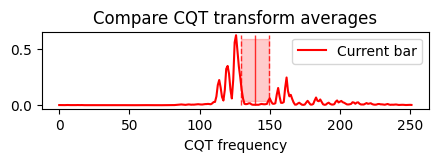

In [14]:
CQT, CQT_center_of_mass, CQT_var = looper.computeCQT(segment, 
                                                     looper.sr, 
                                                     plotflag=True)

### Amplitude and spectral descriptors
We now compute the amplitude of the signal and the spectral flatness and centroid as continuous signals.

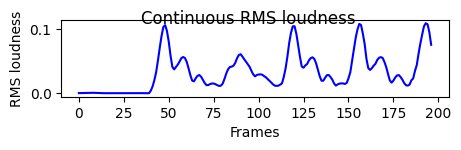

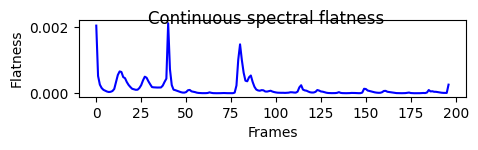

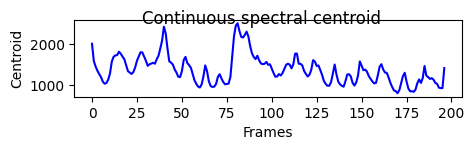

In [15]:
amplitude = looper.computeAmplitude(segment, looper.sr, plotflag=True)
flatness = looper.computeFlatness(segment, looper.sr, plotflag=True)
centroid = looper.computeCentroid(segment, looper.sr, plotflag=True)

### Onset-based representations
We can compute the onset-based representations of the descriptor vectors, which only represent the descriptors in correspondence of the onsets of the signal, resembling a simbolic representation.

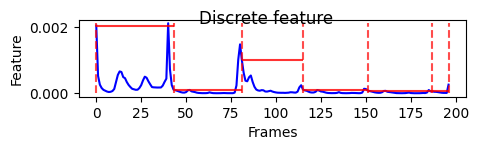

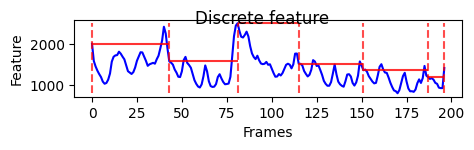

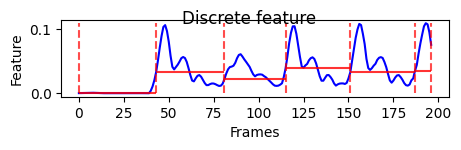

In [16]:
discrete_flatness = looper.computeDiscreteFeature(flatness, onsets, looper.sr, plotflag=True)
discrete_centroid = looper.computeDiscreteFeature(centroid, onsets, looper.sr, plotflag=True)
discrete_amplitude = looper.computeDiscreteFeature(amplitude, onsets, looper.sr, plotflag=True)

## Comparing features
The ALL compares features according to metrics functions and takes decisions based on these comparisons. This section shows some ways in which two meso-level sound signals can be compared. We start by selecting two segments to compare. 

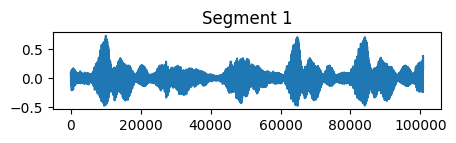

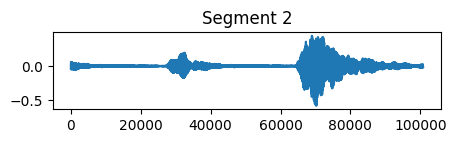

In [17]:
segment_num = 22
segment1 = looper.signal[looper.signal_subdivided_samples[segment_num]:looper.signal_subdivided_samples[segment_num+1]]
segment_num = 34
segment2 = looper.signal[looper.signal_subdivided_samples[segment_num]:looper.signal_subdivided_samples[segment_num+1]]
plt.figure(figsize=(5, 1))
plt.plot(segment1)
plt.title('Segment 1')
plt.show()

plt.figure(figsize=(5, 1))
plt.plot(segment2)
plt.title('Segment 2')
plt.show()

### Comparing binary rhythms with Hamming distance
We can compute the similarity of two binary rhythms by computing the Hamming distance between the two binary vectors.

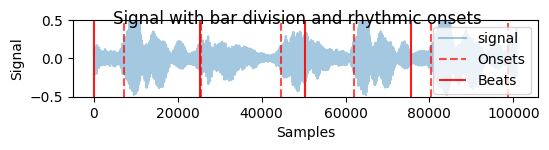

Binary rhythm:  [0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1]


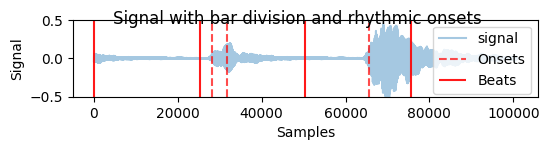

Binary rhythm:  [0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]
[0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1]
[0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]
Binary Comparison coefficient: 0.750
Rhythm Density Comparison coefficient: 0.188


In [18]:
binary_rhythm1, onsets1, _, _ = looper.computeBinaryRhythm(segment1, 
                                                           looper.sr, 
                                                           plotflag=True)
binary_rhythm2, onsets2, _, _ = looper.computeBinaryRhythm(segment2, 
                                                           looper.sr, 
                                                           plotflag=True)
_, _ = looper.compareBinaryRhythms(binary_rhythm1, 
                                 binary_rhythm2, 
                                 rhythm_subdivisions=16)

### Spectral Overlap
We can compute the overlap of the spectral badwidth of two signals to understand if they occupy the same frequency range.

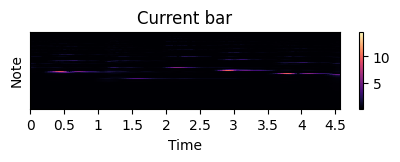

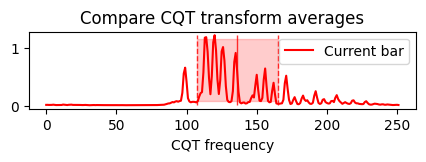

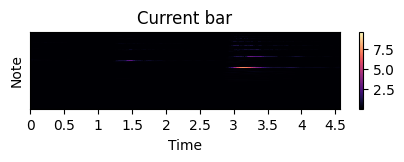

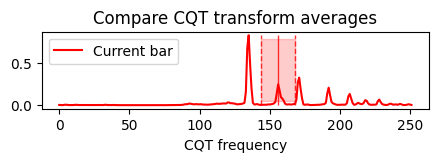

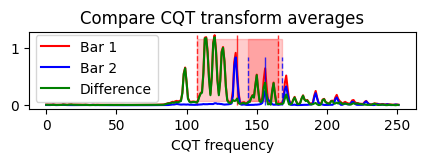

Spectral energy overlap coefficient: 0.862
Spectral energy difference coefficient: 0.093


In [19]:
CQT1, CQT1_center_of_mass, CQT1_var = looper.computeCQT(segment1, 
                                                        looper.sr, plotflag=True)
CQT2, CQT2_center_of_mass, CQT2_var = looper.computeCQT(segment2, 
                                                        looper.sr, plotflag=True)
_, _ = looper.compareSpectralBandwidth(CQT1, 
                                     CQT1_center_of_mass, 
                                     CQT1_var, 
                                     CQT2, 
                                     CQT2_center_of_mass, 
                                     CQT2_var, plotflag=True)

### Continuous Pearson correlation
We can compute the correlation between two continuous signals to understand if they have similar trajectories.

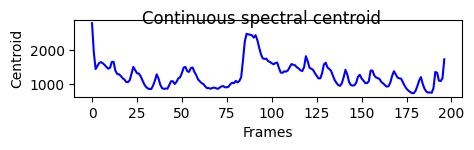

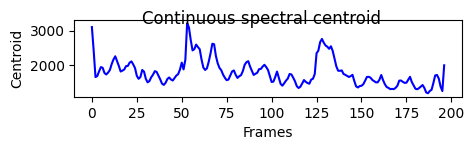

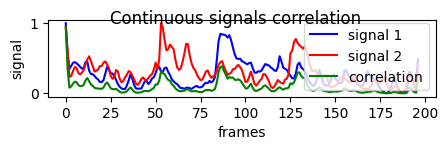

Continuous pearson correlation coefficient: 0.290


In [20]:
centroid1 = looper.computeCentroid(segment1, looper.sr, plotflag=True)
centroid2 = looper.computeCentroid(segment2, looper.sr, plotflag=True)
_, _ = looper.computeContinuousCorrelation(centroid1, 
                                          centroid2, 
                                          plotflag=True)

### Discrete Pearson Correlation
We can compute the discrete correlation between two signals by comparing their values in correspondence of the onsets. This can give more accurate results for onset-based instruments. 

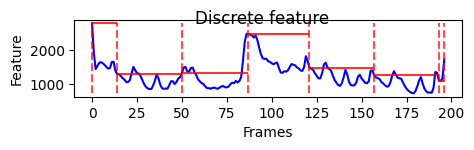

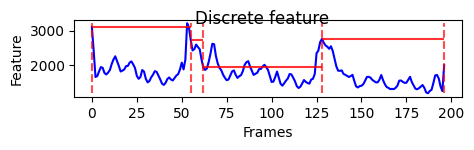

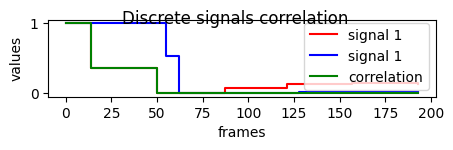

Discrete pearson correlation coefficient: 0.520


In [21]:
_ = looper.computeDiscreteFeature(centroid1, onsets1, looper.sr, plotflag=True)
_ = looper.computeDiscreteFeature(centroid2, onsets2, looper.sr, plotflag=True)
_, _ = looper.computeDiscreteCorrelation(onsets1,
                                         centroid1,
                                         onsets2,
                                          centroid2, 
                                          plotflag=True)

## Running the multi-agent algorithm over the whole track
We can now run the simulation of the multi-agent ALL algorithm over the whole track from the beginning. 


Initializing Autonomous Looper offline
--------------------------------------------------

Configuration options:
{
    "tempo": 105,
    "beats_per_loop": 4,
    "rhythm_subdivision": 32,
    "looping-rules": [
        [
            {
                "rule-name": "Timbral similarity",
                "rule-type": "more",
                "rule-threshold": 0.001
            },
            {
                "rule-name": "Rhythmic similarity",
                "rule-type": "less",
                "rule-threshold": 0.8
            }
        ],
        [
            {
                "rule-name": "Timbral similarity",
                "rule-type": "more",
                "rule-threshold": 0.001
            },
            {
                "rule-name": "Rhythmic similarity",
                "rule-type": "less",
                "rule-threshold": 0.7
            }
        ],
        [
            {
                "rule-name": "Timbral similarity",
                "rule-type": "more",
         

/Users/vincemad/Desktop/PhD/04_project/04_autonomous-live-looper/ALL-Autonomous-Live-Looper/offlineALLclass.py:604: RuntimeWarning: invalid value encountered in scalar divide
  CQT_center_of_mass = sum([CQT_mean[i]*i for i in range(CQT_mean.shape[0])]) / sum(CQT_mean)
/opt/anaconda3/envs/looper/lib/python3.13/site-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/Users/vincemad/Desktop/PhD/04_project/04_autonomous-live-looper/ALL-Autonomous-Live-Looper/offlineALLclass.py:727: RuntimeWarning: invalid value encountered in scalar divide
  spectral_energy_overlap_coefficient = min(spectral_energy_overlap_index, min(CQT1_var*2, CQT2_var*2)) / min(CQT1_var*2, CQT2_var*2)
/Users/vincemad/Desktop/PhD/04_project/04_autonomous-live-looper/ALL-Autonomous-Live-Looper/offlineALLclass.py:879: RuntimeWarning: invalid value encountered in divide
  continuous_pearson_correlation = ((signal1 - signal1.mean(axis=1).reshape(-1,1)) 

Binary rhythms:
[1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Binary Comparison coefficient: 0.875
Rhythm Density Comparison coefficient: 0.156
Spectral bandwidth:
Spectral energy overlap coefficient: nan
Spectral energy difference coefficient: 0.042
Chroma:
Absolute Error difference coefficient: 0.368
Continuous pearson correlation coefficient: 0.000
Discrete pearson correlation coefficient: 0.000
Loudness:
MSE between the two signal is: 0.161
Continuous pearson correlation coefficient: 0.000
Discrete pearson correlation coefficient: 0.000
Spectral centroid:
MSE between the two signal is: 0.300
Continuous pearson correlation coefficient: 0.000
Discrete pearson correlation coefficient: 0.000
Spectral flatness:
MSE between the two signal is: 1.000
Continuous pearson correlation coefficient: 0.000
Discrete pearson correlation coefficient: 0.000

Bar 2
----------------------------------------
Binary 

/Users/vincemad/Desktop/PhD/04_project/04_autonomous-live-looper/ALL-Autonomous-Live-Looper/offlineALLclass.py:812: RuntimeWarning: invalid value encountered in divide
  normalized_values1 = (new_values1 - new_values1.min()) / (new_values1.max() - new_values1.min())


Binary rhythms:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Binary Comparison coefficient: 0.906
Rhythm Density Comparison coefficient: 0.125
Spectral bandwidth:
Spectral energy overlap coefficient: 1.000
Spectral energy difference coefficient: 0.121
Chroma:
Absolute Error difference coefficient: 0.208
Continuous pearson correlation coefficient: -0.174
Discrete pearson correlation coefficient: -0.133
Loudness:
MSE between the two signal is: 0.121
Continuous pearson correlation coefficient: -0.105
Discrete pearson correlation coefficient: 0.000
Spectral centroid:
MSE between the two signal is: 0.127
Continuous pearson correlation coefficient: -0.498
Discrete pearson correlation coefficient: 0.000
Spectral flatness:
MSE between the two signal is: 0.062
Continuous pearson correlation coefficient: -0.241
Discrete pearson correlation coefficient: 0.000

Bar 98
----------------------------------------

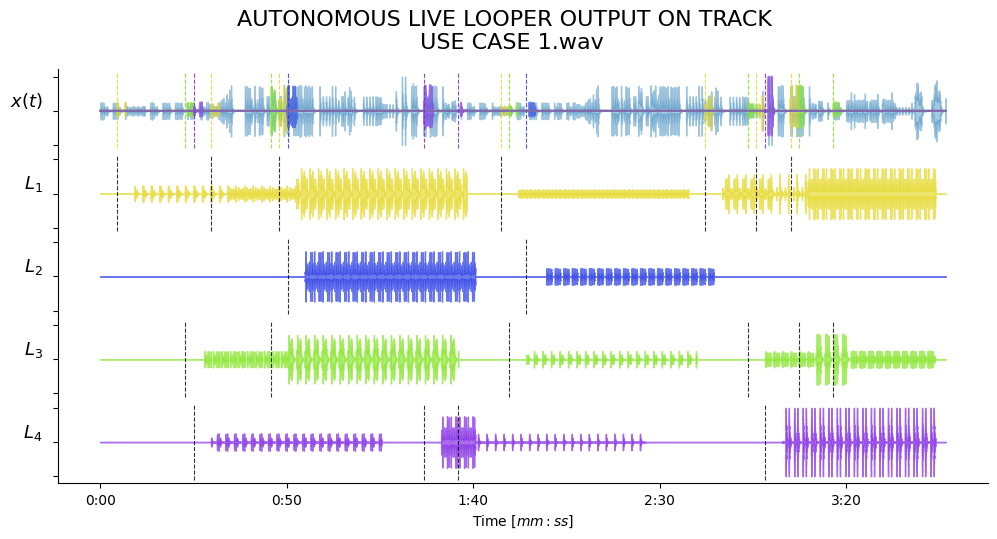

In [22]:
looper = AutonomousLooperOffline(soundfile_filepath, 
                                 config_filepath=config_filepath, 
                                 plotFlag=False)
looper.computeLooperTrack(output_dir_path)